# IoT & Smart Analytics
## A Program by IIIT-H and TalentSprint

## Learning Objectives
At the end of the experiment, participants will be able to : 
* understand the importance of PCA
* apply PCA

#### Importing Required Packages

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

Run given below syntaxes in a different cell to install libraries if required by removing the backward slash. \\
!pip install sklearn \\
!pip install pandas \\
!pip install matplotlib \\

#### Loading Data
Using SciKit-Learns ```fetch_openml``` to load MNIST data.

In [2]:
mnist = fetch_openml('mnist_784', cache=False)

Understanding the data:

In [3]:
print('Data Shape :',mnist.data.shape,'\n')
print('Keys : ',mnist.keys(),'\n')
print('Description :', mnist.DESCR)

Data Shape : (70000, 784) 

Keys :  dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url']) 

Description : **Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio.

Separating features and targets

In [4]:
X, y = mnist["data"].values, mnist["target"].values
print(X.shape)
# Try running given below codes in new cells
# mnist["data"].info()
# mnist["data"].info()

(70000, 784)


Visualizing the data set

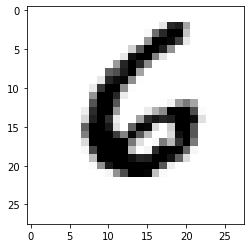

In [5]:
sample_digit = X[90] # Check the result by putting different values in square bracket 
sample_digit_image = sample_digit.reshape(28, 28)
plt.imshow(sample_digit_image, cmap=mpl.cm.binary)
plt.show()

Checking the corresponding label & converting the data type

In [6]:
print(y[90])
print(type(y[90]))
y = y.astype(np.uint8)
print(type(y[90]))


6
<class 'str'>
<class 'numpy.uint8'>


#### Applying Classification Algorithm

Train Test Split

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# We can use 'train_test_split' as given below :
# X_train, X_test, y_train, y_test = train_test_split(X, y)

Training:

In [8]:
%%time
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train)

CPU times: user 3min 3s, sys: 240 ms, total: 3min 3s
Wall time: 3min 3s


Predicting an output for any given sample

In [9]:
sgd_clf.predict([sample_digit])

array([6], dtype=uint8)

### Measuring Accuracy

In [10]:
%%time
from sklearn.model_selection import cross_val_score
print(cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy"))

[0.87365 0.85835 0.8689 ]
CPU times: user 5min 39s, sys: 594 ms, total: 5min 40s
Wall time: 5min 37s


#### Training the model after reducing the features using PCA

#### Applying PCA and reducing the number of features

In [11]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

154

Understanding each syntax by running in individual cells

In [12]:
pca.explained_variance_ratio_

array([9.70466436e-02, 7.09592406e-02, 6.16908876e-02, 5.38941949e-02,
       4.86879702e-02, 4.31223132e-02, 3.27192995e-02, 2.88389545e-02,
       2.76202940e-02, 2.35700055e-02, 2.10918962e-02, 2.02299108e-02,
       1.71581820e-02, 1.69211143e-02, 1.57864128e-02, 1.48295261e-02,
       1.32456095e-02, 1.27689737e-02, 1.18726294e-02, 1.15268370e-02,
       1.06616621e-02, 1.00671337e-02, 9.53573327e-03, 9.12543746e-03,
       8.83404692e-03, 8.39319141e-03, 8.12578809e-03, 7.86366084e-03,
       7.44733102e-03, 6.90859128e-03, 6.58093773e-03, 6.48147870e-03,
       6.02615030e-03, 5.86582188e-03, 5.70021474e-03, 5.43627771e-03,
       5.05786416e-03, 4.87858604e-03, 4.81429342e-03, 4.72266326e-03,
       4.56746921e-03, 4.44836012e-03, 4.18501329e-03, 3.98215339e-03,
       3.84974607e-03, 3.75103387e-03, 3.62008852e-03, 3.51591277e-03,
       3.40058205e-03, 3.21874467e-03, 3.19017051e-03, 3.12804939e-03,
       2.95982668e-03, 2.88954600e-03, 2.84130398e-03, 2.71435811e-03,
      

In [13]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.09704664, 0.16800588, 0.22969677, 0.28359097, 0.33227894,
       0.37540125, 0.40812055, 0.4369595 , 0.4645798 , 0.4881498 ,
       0.5092417 , 0.52947161, 0.54662979, 0.56355091, 0.57933732,
       0.59416685, 0.60741246, 0.62018143, 0.63205406, 0.6435809 ,
       0.65424256, 0.66430969, 0.67384542, 0.68297086, 0.69180491,
       0.7001981 , 0.70832389, 0.71618755, 0.72363488, 0.73054347,
       0.73712441, 0.74360589, 0.74963204, 0.75549786, 0.76119807,
       0.76663435, 0.77169222, 0.7765708 , 0.7813851 , 0.78610776,
       0.79067523, 0.79512359, 0.7993086 , 0.80329076, 0.8071405 ,
       0.81089154, 0.81451162, 0.81802754, 0.82142812, 0.82464686,
       0.82783703, 0.83096508, 0.83392491, 0.83681446, 0.83965576,
       0.84237012, 0.84506533, 0.84765006, 0.85018776, 0.85263557,
       0.85504063, 0.85743326, 0.85973735, 0.86195267, 0.86408988,
       0.86616213, 0.86819256, 0.87016038, 0.87208891, 0.87397523,
       0.875845  , 0.87765583, 0.87943146, 0.88118044, 0.88283

#### Visualizing the cumsum

Total number of features : 784 



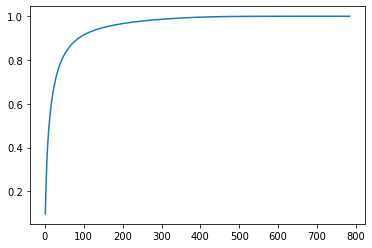

In [14]:
n=len(cumsum)
print('Total number of features :', n,'\n')
xx=np.arange(1,n+1)
plt.plot(xx,cumsum)

#### Reducing the features of Training data using PCA

In [15]:
pca=PCA(n_components=154)
X_train_reduced=pca.fit_transform(X_train)

#### Similarly reducing the features of Test data using PCA
visualizing any one data: 

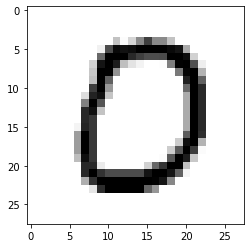

In [16]:
sample_digit = X_test[10]
sample_digit_image = sample_digit.reshape(28, 28)
plt.imshow(sample_digit_image, cmap=mpl.cm.binary)
plt.show()

Reducing Test data feature:

In [17]:
X_test_reduced=pca.fit_transform(X_test)

#### Applying Classification Algorithm after PCA
Now apply classification operation in 'X_reduced' data. While most of the variance(95%) is preserved, the dataset is now less than 20% of its original size. This speeds up the classification algorithm tremendously.

Training:

In [18]:
%%time
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train_reduced, y_train)

CPU times: user 43.4 s, sys: 42 ms, total: 43.5 s
Wall time: 43.3 s


Prediction:

In [19]:
sgd_clf.predict([X_test_reduced[10]])

array([0], dtype=uint8)

### Measuring accuracy

In [20]:
%%time
from sklearn.model_selection import cross_val_score
print(cross_val_score(sgd_clf, X_train_reduced, y_train, cv=3, scoring="accuracy"))

[0.88085 0.8798  0.8861 ]
CPU times: user 1min 35s, sys: 331 ms, total: 1min 35s
Wall time: 1min 35s


### Transform data back to its original space.
Reducing feature of X_train using PCA:

In [31]:
pca=PCA(n_components=154)
X_reduced=pca.fit_transform(X_train)

Recovering back the features of X_reduced:

In [32]:
X_recovered = pca.inverse_transform(X_reduced)

Visualizing and comparing with original data:
* Recovered sample image

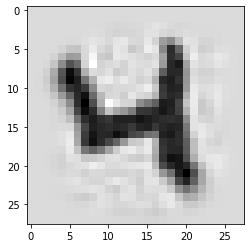

In [33]:
sample_digit = X_recovered[20]
sample_digit_image = sample_digit.reshape(28, 28)
plt.imshow(sample_digit_image, cmap=mpl.cm.binary)
plt.show()

* Original sample image

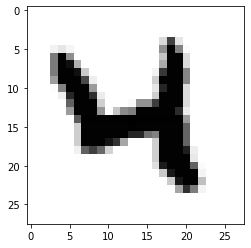

In [34]:
sample_digit = X_train[20]
sample_digit_image = sample_digit.reshape(28, 28)
plt.imshow(sample_digit_image, cmap=mpl.cm.binary)
plt.show()